In [0]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist

In [3]:
!pip install tensorly


In [0]:
from tensorly.tenalg import kronecker

In [0]:
peaks = sio.loadmat('/content/Peaks.mat')

In [0]:
Y = peaks['Y']

In [0]:
y_flat = Y.flatten().reshape(10000,1)
y_flat = (y_flat - y_flat.min())/(y_flat.max() - y_flat.min())*2 -1

In [35]:
y_flat.min()

-1.0

In [0]:
X = np.linspace(-1, 1, 10000).reshape(10000,1)

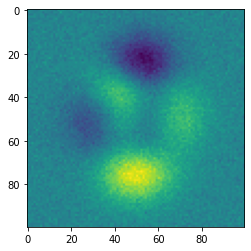

In [37]:
plt.imshow(Y)

In [0]:
kernel_1 = np.exp(-X**2/2)

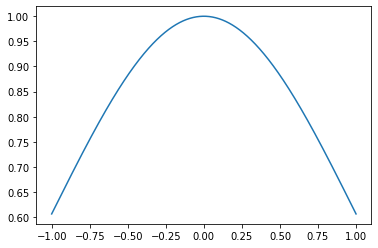

In [42]:
plt.plot(X,kernel_1)

In [0]:
kernel_2 = kronecker([kernel_1, kernel_1.T])

In [44]:
kernel_2.shape

(10000, 10000)

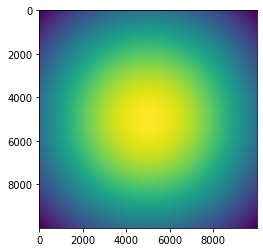

In [45]:
plt.imshow(kernel_2)

In [0]:
sum_matrix = kernel_2 + 0.1 * np.identity(10000)

In [0]:
inv = np.linalg.inv(sum_matrix)

In [0]:
alpha = np.dot(inv, y_flat)

In [49]:
alpha.shape

(10000, 1)

In [0]:
y_hat = np.dot(kernel_2, alpha)

In [0]:
y_hat_std = (y_hat - y_hat.min())/(y_hat.max()-y_hat.min()) * 2 -1

In [93]:
y_hat_std.max()

1.0

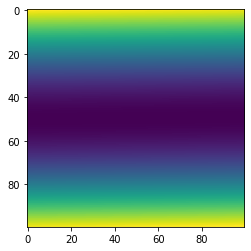

In [94]:
plt.imshow(y_hat_std.reshape(100,100))

In [0]:
## noise = 
noise = y_flat - y_hat_std


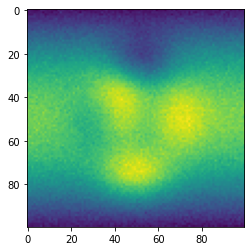

In [96]:
plt.imshow(noise.reshape(100,100))

In [97]:
#Standard Deviation
np.std(noise)

0.6853771291660543